<a href="https://colab.research.google.com/github/BLayus/Case_Fraude/blob/main/PED_Case_1_Detec%C3%A7%C3%A3o_de_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descrição do Problema

**Dados**

score_1 a score_10: São notas de bureau de crédito que a empresa adquiriu para identificar se o comprador é confiável ou outros dados anonimizados que não temos informação sobre

País: pais de compra

Produto: produto que está sendo comprado no e-commerce

Categoria_produto: categoria a qual esse produto se encaixa

Entrega_doc_1 a entrega_doc_3: Documentos requisitados no momento de fazer a conta. 0 = N = nao entregou. Y = 1 = entregou. Se vazio, considere que nao entregou

Score_fraude_modelo: score dado pelo modelo atual. É a probabilidade daquela compra ser uma fraude ou nao. Quanto mais próximo de 100, maior a certeza do modelo que é fraude

Fraude: informacao se aquela compra era fraudulenta ou nao. Foi inserida após alguns dias, para termos o feedback real se de fato era fraudulenta ou nao. 0 se nao era fraudulenta e 1 se era fraudulenta


**Notas importantes**

Pra fins desse case os dados são anonimizados propositadamente.

Para resolvê-lo, vocês vão precisar fazer algumas suposições. Justifique toda suposição que fizer.

Sabemos que a empresa ganha 10% do valor de um pagamento aprovado corretamente e a cada fraude aprovada perdemos 100% do valor do pagamento.

**Analistas de Dados**

Seu trabalho vai ser entender o perfil de fraude. Vocês podem fazer em SQL, Python ou qualquer outra linguagem que queiram

[+júnior]

Quais métricas (KPIs) são importantes para o problema de fraude? Veja as “notas importantes” para isso e pesquisem!

Como estão esses nossos KPIs atualmente?

Quanto estamos perdendo atualmente em fraude x quanto estamos ganhando em aprovação? Note que temos apenas uma amostra de dados, então não temos aqui os valores totais de perdas. Escreva esse disclaimer.

Entenda como está o perfil geral de features - análise univariada. Procure aqui também por anomalias, nulos, etc.

Agora entenda o perfil do fraudador. Veja cada feature em relação aos fraudadores x não fraudadores. Use e abuse de correlações, testes de hipótese, etc.

Faça um PowerBI ou Looker com os principais KPIs e gráficos que geram insights nesse tema


[+pleno]

Use alguns algoritmos para melhor entendimento do perfil de fraude, como regressão logística ou algum outro que achar válido


[+sênior]

Construa “regras duras” para evitarmos fraude sem o uso de machine learning.

Aqui são regras mesmo, por exemplo, se valor acima de X então barramos uma transação.

Discuta os prós e contras dessa sua estratégia.

Simule perdas e ganhos da estratégia.

Desenhe um teste AB para testarmos sua estratégia.


**Cientistas de Dados**


[+júnior]

Façam uma EDA - Análise exploratória de dados. Podem se basear nas perguntas do analista para isso.

Desenvolva um modelo para predizer a variável Fraude (1-Sim, 0-Não). Quais técnicas testou? Qual selecionou como melhor abordagem? Explique!

Compare o desempenho do seu algoritmo com o desempenho de um modelo anterior, cujo resultado é encontrado na coluna Score_fraude_modelo do dataset. Quais métricas usou e qual sua conclusão?

Queremos encontrar o ponto de threshold ideal para o modelo já treinado apresentado na parte (Score, onde 0 (zero) é o risco mais baixo e 100 (cem) o mais alto). Defina o ponto de corte que maximize os lucros da empresa, de forma que todos os pagamentos com menor Score sejam aprovados e os maiores sejam rejeitados.


[+pleno]

Como você pode garantir que o desempenho do modelo no laboratório vai ser um proxy para o desempenho do modelo em produção?

Supondo que o desempenho produtivo seja muito diferente do esperado, quais você acha que são as causas mais prováveis?

Se o modelo precisar responder online, no menor tempo possível, o que isso mudaria no desenvolvimento do seu modelo?


[sênior][projeto de alto impacto][ML Engineers]

Para aqueles que estão buscando vagas mais sênior ou realmente um projeto que destaque MUITO você, minha dica é fazer isso se você já tiver estudado machine learning muito bem e já possa partir para conceitos de deploy.

Use ferramentas como o MLFlow para testes.

Simule um deploy do modelo. Use Docker, Kuberneters, AWS, etc. Tudo que achar necessário para fazer o deploy.

Pense no monitoramento do modelo

Scores são adquiridos dos bureaus de crédito

Primeiro passo é avaliar a taxa de fraudes, que neste caso é de 5% pra 95%

Fazer um df describe para avaliar os limites máximos e mínimos de cada coluna pra saber se há algum dado muito estranho

verificar os data types

verificar data dos dados, neste caso não há muita utilidade na data por ser apenas um mês

Avaliando missing values: Criar uma nova coluan pra cada coluna com is missing, ver print secreen

Como prencher os missing, knn imputer, usar média, mediana, moda, etc

Criar uma coluna booleana pra cada coluna pra marcar o que é missing ou não

A fraude provavelmente está no outlier, então remover os outliers pode ser perda de informação

Cardinalidade: como os dados variam em cada coluna?
coluan produto tem muitas categorias diferentes, não faz sentido usar uma coluna com tanta variação

Pais brasiol argentina e outros, já que 97 %dos dados são entre br e ar e muito pouco nos outros

Categorias dos produtos podem ser 1000 principais categorias e agrupar as outras em outros

Features numéricas, olhar distribuição, correlação, variância, features constatntes não são legais pro modelo, não importam muito
coeficiente de variância é mais importante

avaliando as distribuições das features numéricas entre os casos de fraude e não fraude

Tudo que estamnos olhando são amostras, fazer testes de hipóteses para avaliar se as distrbuições são realmente parecidas ou diferentes

ao analisar dias, hora etc, tomar cuidado pra não criar regras de detecção que levem isto em conta, pois os fraudadores podem "descobrir" e alterar o dia, hora de fraudes

Y profiling

pipeline

Usar balanceamento de dados inblearn
class weight lightgb e xgboost, balanced random forest

Tuning de hiperparametros
grid search bayes search cv e random search, são as funções pata tuning

plotar graficos com predict proba dos clientes q fraudou ou não




## Importando Bibliotecas e Dataset

In [ ]:
# Importando bibliotecas

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import datetime
import calendar

import math

from scipy import stats
from scipy.stats import shapiro
from scipy.stats import kstest
import scipy.stats

import statsmodels.api as sm

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder

In [ ]:
# Importando dados do google drive

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Data Science/Case 1 PED_Detecção de Fraude/PED_Case 1_Fraude.csv', index_col= False, encoding= 'utf_8')


Mounted at /content/drive


In [ ]:
# Primeira visualização do dataset

df.head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0


## Tratamento Inicial de Dados


In [ ]:
# Reordenando colunas, pois algumas colunas do grupo score ficaram deslocadas do restante

df.columns

Index(['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'pais', 'score_7', 'produto', 'categoria_produto', 'score_8', 'score_9',
       'score_10', 'entrega_doc_1', 'entrega_doc_2', 'entrega_doc_3',
       'data_compra', 'valor_compra', 'score_fraude_modelo', 'fraude'],
      dtype='object')

In [ ]:
df = df.reindex(columns= ['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
'score_7', 'score_8', 'score_9', 'score_10', 'entrega_doc_1',
'entrega_doc_2', 'entrega_doc_3', 'pais', 'produto', 'categoria_produto','data_compra',
'valor_compra', 'score_fraude_modelo', 'fraude'])

In [ ]:
# Inspecionando nomes de colunas, contagem de nulos e d-types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score_1              150000 non-null  int64  
 1   score_2              137016 non-null  float64
 2   score_3              137016 non-null  float64
 3   score_4              149635 non-null  float64
 4   score_5              150000 non-null  float64
 5   score_6              149989 non-null  float64
 6   score_7              150000 non-null  int64  
 7   score_8              150000 non-null  float64
 8   score_9              149989 non-null  float64
 9   score_10             149635 non-null  float64
 10  entrega_doc_1        150000 non-null  int64  
 11  entrega_doc_2        41143 non-null   object 
 12  entrega_doc_3        150000 non-null  object 
 13  pais                 149806 non-null  object 
 14  produto              150000 non-null  object 
 15  categoria_produto

In [ ]:
# Mostrando quantos valores são NAN em cada coluna

df.isna().sum()

score_1                     0
score_2                 12984
score_3                 12984
score_4                   365
score_5                     0
score_6                    11
score_7                     0
score_8                     0
score_9                    11
score_10                  365
entrega_doc_1               0
entrega_doc_2          108857
entrega_doc_3               0
pais                      194
produto                     0
categoria_produto           0
data_compra                 0
valor_compra                0
score_fraude_modelo         0
fraude                      0
dtype: int64

<Axes: >

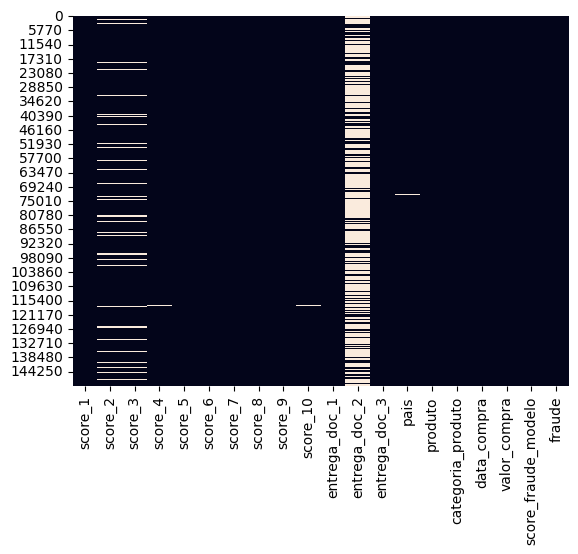

In [ ]:
# Mostrando nulos através de Heatmap

sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# Substituindo dados faltantes, os modelos de ML não trabalham bem com nulos...

# Score 2 - 12984 faltantes

# Score 3 - 12984 faltantes

# Score 4 - 365 faltantes

# Score 6 - 11 faltantes

# Score 9 - 11 faltantes

# Score 10 - 365 faltantes

# Entrega doc 2 - 108857 faltantes
# Imputar 0  (não entregue para todos os faltantes, de acordo com texto da descrição)

df['entrega_doc_2'] = df['entrega_doc_2'].fillna(0)

# País - 194 faltantes
# Analisar se vale a pena identificar o pais com base no tipo de produto. A maioria dos dados são do Brasil e depois Argentina
# Proponho usar alguma biblioteca para identificar se o texto do produto está em português => BR ou não => AR


<Axes: xlabel='score_2', ylabel='Count'>

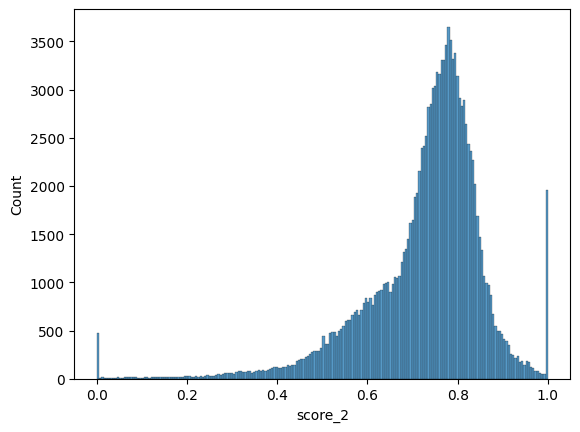

In [ ]:
# Será difícil imputar qualquer valor aos scores 2, 3, 4, 6, 9 e 10 pois são muitos valores diferentes, talvez usar a média ou a moda...

sns.histplot(data=df, x= 'score_2')


### Imputando os países com langdetect

In [ ]:
# Usando langdetect para detectar se é português => BR ou espanhol => AR

!pip install langdetect
from langdetect import detect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=d850ec49bc7d262f03a62eef2d6941e6a7a9204302a06b27e590d77838ff09df
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
# Fitrando dataset apenas com as linhas dos 194 paises faltantes e seus produtos

df_detect_pais = pd.DataFrame(df[df['pais'].isnull()])


In [ ]:
text = df_detect_pais['produto']

text

202       Máscara Descartável Tnt Tripla C/ 20 Unid. Env...
1046      Skin Atheris Csgo Ww Com Etiqueta De Nome E Ad...
1188      Mascara N95 Não Descartável Pff2 Pff3 Risco Bi...
2508      Aquecedor Lavatório Cabeleireiro Wm 110v + Man...
3031                     Cd Laura Pausini - La Mia Risposta
                                ...                        
148268    Mascara Proteccion Facial Transparente Barbijo...
148305    Smartband M3 Pulseira Inteligente Monitor Card...
148719    Disco De Freio Cg Titan Fan 150 2009/2016 Fan ...
149265    Bordeadora Eléctrica Plumita 1000w + Regalos -...
149676    Receptor Bluetooth 3.0 Auto Aux Manos Libres S...
Name: produto, Length: 194, dtype: object

In [ ]:
texto = [''+item+'' for item in text]

print(texto)

['Máscara Descartável Tnt Tripla C/ 20 Unid. Envio Imediato', 'Skin Atheris Csgo Ww Com Etiqueta De Nome E Adesivos', 'Mascara N95 Não Descartável Pff2 Pff3 Risco Biológico Air S.', 'Aquecedor Lavatório Cabeleireiro Wm 110v + Mangueira E Ducha', 'Cd Laura Pausini - La Mia Risposta', 'Meias Para Bebê Tipo Pantufa - Kit Com 12 Pares 3d', 'Saw Palmetto Extract 160mg 120 Softgels Now Importado Eua!', 'Carretel Para Aparador De Grama Gl600n Black Decker A6001-la', 'Parafuso Suporte Tv Sansung Linha Ru7100', 'Cortina Voil Com Forro Blackout 3,00m X 2,80m Corta Luz', 'Kit Smok Vape Pen 22, Capa, Vidro E Vapeband', 'Xiaomi Redmi 8 Dual Sim 32 Gb Preto-ônix 3 Gb Ram', 'Jarra Elétrica 1.8l Em Inox 110v Vendedor Reputação 100%', 'Frente Farol Vermelha Titan Fan 160 Ex 2016 2017 2018 2019', 'Corrector Juanete 2 En 1 Separador De Dedos Agnovedades', 'Nutritional Yeast Flocos 120g Levedura Nutricional', 'Lixadeira Motor Unha Elétrica Profissional Mercedez Oferta', 'Chave De Raio 8x9 + 11x12 + 13x13 

In [ ]:
df_detect_pais['pais'] = [detect(text) for text in texto]


In [ ]:
df_detect_pais['pais'] = df_detect_pais['pais'].apply(lambda x: 'AR' if x != 'pt' else 'BR')

In [ ]:
# merge dos dois datasets com index como chave

column_merge = df_detect_pais['pais']

column_merge.index

#df_merge = pd.merge(df, column_merge, on= 'index')

#df_merge

Int64Index([   202,   1046,   1188,   2508,   3031,   3378,   3594,   3791,
              7301,   7864,
            ...
            142644, 143118, 144532, 144756, 148006, 148268, 148305, 148719,
            149265, 149676],
           dtype='int64', length=194)

In [ ]:
for i in column_merge.index:
  df.loc[i, 'pais'] = column_merge[i]


## Análise Exploratória

In [ ]:
# Aplicando um plot style para os gráficos

plt.style.use('seaborn-v0_8')

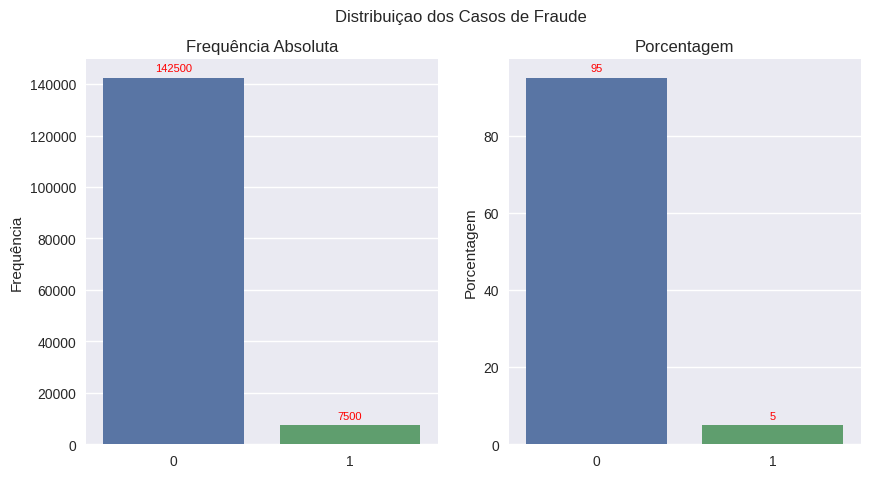

fraude  Frequência  Porcentagem
0           142500         95.0
1             7500          5.0


In [ ]:
# Avaliando distribuição absoluta e percentual dos casos de FRAUDES

dist_abs = df['fraude'].value_counts()
dist_percent = df['fraude'].value_counts(normalize=True) * 100

freq = pd.DataFrame({'Frequência':dist_abs, 'Porcentagem': dist_percent})
freq.rename_axis('fraude', axis='columns', inplace=True)

fig, axes = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Distribuiçao dos Casos de Fraude')
axes[0].set_title('Frequência Absoluta')
axes[1].set_title('Porcentagem')
ax1 = sns.barplot(x=freq.index, y=freq['Frequência'], ax=axes[0])
ax2 = sns.barplot(x=freq.index, y=freq['Porcentagem'], ax=axes[1])

ax1.bar_label(ax1.containers[0], fontsize= 8, color= 'red', padding= 3)
ax2.bar_label(ax2.containers[0], fontsize= 8, color= 'red', padding= 3)

plt.show()
print(freq)


Apenas **7500** casos dentre os 150 mil listados (ou **5%** dos casos) neste dataset foram fraudes confirmadas.



In [ ]:
# Avaliando quantos casos foram identificados pelo modelo como possíveis fraudes

(df['score_fraude_modelo'] >= 90).sum()

# Foram 12752 casos avaliados pelo modelo preditivo com probabilidade de fraude maior ou igual a 90%, aproximadamente 5200 casos a mais que as fraudes reais (7500)
# Isso nos leva a imaginar qual seria o ponto de corte ideal da probabilidade que leva nosso modelo a classificar como fraude (1) ou não fraude (0)

12752

In [ ]:
# Vamos olhar para outros aspectos importantes do Dataset

# Quantidade de países em termos absolutos e percentuais

paises_abs = df['pais'].value_counts()
paises_percent = df['pais'].value_counts(normalize=True) * 100


df_paises = pd.DataFrame({'Frequência':paises_abs, 'Porcentagem': paises_percent})

df_paises.head()

# Podemos ver que a maioria das transações são de compras no brasil, seguidos por Argentina, Uruguay e USA
# Em quais países temos maior quantidade absoluta e percentual de fraudes confirmadas, será que há um padrão de fraude relacionada à localidade?


,Frequência,Porcentagem
BR,111628,74.515039
AR,31964,21.336929
UY,2967,1.980562
US,2273,1.517296
SE,358,0.238976


In [ ]:
# Vamos agrupar este dataframe por fraude confirmada (1) ou não (0)

groups = pd.DataFrame(df.groupby('pais')[['pais', 'fraude']].value_counts(sort= True).reset_index(name= 'Quantidade'))

groups.pivot_table(columns= 'fraude', values='Quantidade')

groups

# Assim conseguimos ver quantos casos de fraudes confirmadas ou refutadas aconteceram por país

,pais,fraude,Quantidade
0,AD,0,1
1,AE,0,2
2,AR,0,30785
3,AR,1,1179
4,AU,0,3
...,...,...,...
61,US,0,2203
62,US,1,70
63,UY,0,2938
64,UY,1,29


In [ ]:
# Isso nos leva a pensar se há uma diferença na proporção de casos de fraude em cada país, vamos pegar os 5 países com mais dados: BR, AR, US, UY, SE

filter_paises = groups.loc[groups['pais'].isin(['BR', 'AR', 'US', 'UY', 'SE'])]

filter_paises['percentual'] = filter_paises.groupby('pais', group_keys=False)['Quantidade'].apply(lambda x: x / x.sum() * 100)

filter_paises

<ipython-input-14-8568e568d88d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_paises['percentual'] = filter_paises.groupby('pais', group_keys=False)['Quantidade'].apply(lambda x: x / x.sum() * 100)


,pais,fraude,Quantidade,percentual
2,AR,0,30785,96.311475
3,AR,1,1179,3.688525
7,BR,0,105466,94.479880
8,BR,1,6162,5.520120
56,SE,0,343,95.810056
57,SE,1,15,4.189944
61,US,0,2203,96.920370
62,US,1,70,3.079630
63,UY,0,2938,99.022582
64,UY,1,29,0.977418


<Axes: xlabel='pais', ylabel='percentual'>

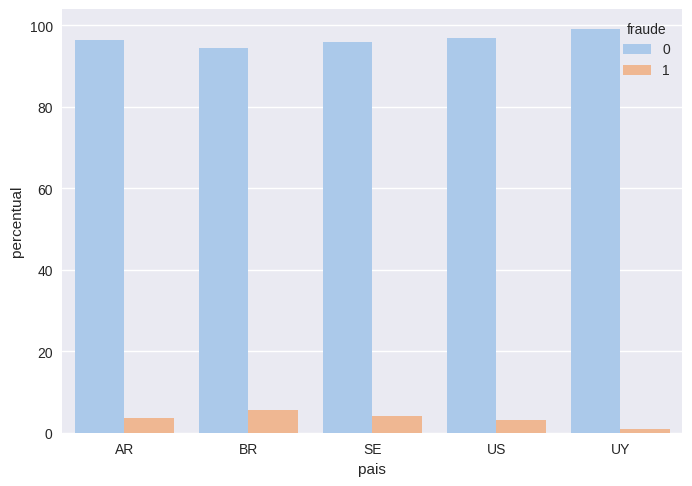

In [ ]:
# Plotando um gráfico para visualizar estes valores percentuais por país

sns.barplot(x= 'pais', y= 'percentual', data= filter_paises, hue= 'fraude', palette= 'pastel')

# Através dos valores percentuais do dataframe e do gráfico, podemos observar que ha uma maior quantidade proporcional de fraudes no Brasil, com 5,52% das transações marcadas como fraude
# Logo em seguida com 4,18% vem a Suécia, depois Argentina, EUA e por último Uruguay.

# Brasil lidera esta listagem tanto em números absolutos de fraudes como em termos percentuais


In [ ]:
# Principais KPIs relacioanados às fraudes e a implementação destes cálculos para o nosso dataset

# Taxa de aprovação de compras (Order Approval Rates) = pedidos aprovados / soma dos pedidos * 100
# Taxa de estornos (Chargeback Rates) = fraudes / pedidos aprovados * 100
# Taxa de fraudes por vendas (Fraud to Sales Ratio) = fraudes / soma dos pedidos * 100

pedidos_aprovados = len(df.loc[df['fraude'] == 0])
soma_pedidos = len(df['fraude'])
pedidos_fraudes = len(df.loc[df['fraude'] == 1])

tx_aprov = pedidos_aprovados / soma_pedidos * 100

tx_estornos =round(pedidos_fraudes / pedidos_aprovados * 100, 2)

tx_fraudes = pedidos_fraudes / soma_pedidos * 100

print(f'Total Pedidos: {soma_pedidos} \n')
print(f'Total de Pedidos Aprovados: {pedidos_aprovados} \n')
print(f'Total Fraudes: {pedidos_fraudes} \n')


print(f'Taxa de Aprovação: {tx_aprov}% \n')
print(f'Taxa de Estornos: {tx_estornos}% \n')
print(f'Taxa de Fraude: {tx_fraudes}% \n')


Total Pedidos: 150000 

Total de Pedidos Aprovados: 142500 

Total Fraudes: 7500 

Taxa de Aprovação: 95.0% 

Taxa de Estornos: 5.26% 

Taxa de Fraude: 5.0% 



O valor mínimo de compra é: 0.02 

O valor máximo de compra é: 3696.35 

O valor médio de compra é: 43.52 



<Axes: xlabel='valor_compra', ylabel='Count'>

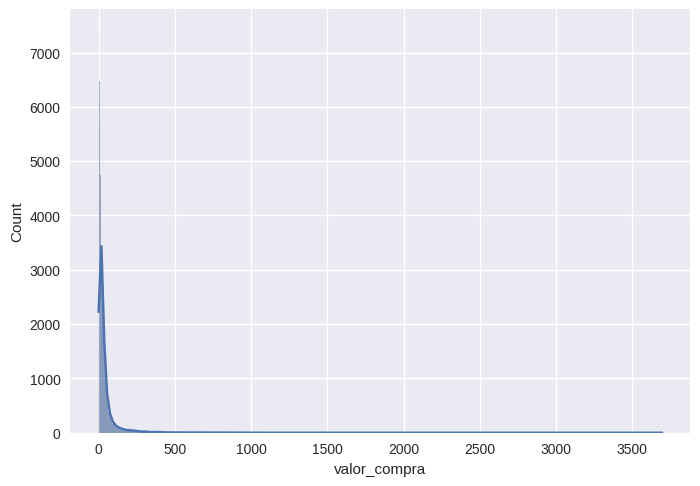

In [ ]:
# Olhar mais especificamente para a feature valor da compra: qual a média, o mínimo e máximo, existem outliers?

min = df['valor_compra'].min()
max = df['valor_compra'].max()
mean = round(df['valor_compra'].mean(), 2)

print(f'O valor mínimo de compra é: {min} \n')
print(f'O valor máximo de compra é: {max} \n')
print(f'O valor médio de compra é: {mean} \n')

sns.histplot( data= df, x= 'valor_compra', kde= True)

In [ ]:
# Dentre as fraudes confirmadas como foram estes valores das compras? Fraudes tendem a ter valores de compras mais altos?

pedidos_fraudes = df.loc[df['fraude'] == 1]

print(pedidos_fraudes['valor_compra'].mean())
print(pedidos_fraudes['valor_compra'].max())
print(pedidos_fraudes['valor_compra'].min())

72.96948266666666
3424.81
0.21


In [ ]:
# Existe algum tipo de predileçao de categoria de produtos / tipos de produtos em compras marcadas como fraudes?

fraudes_categorias = pedidos_fraudes.groupby('categoria_produto').size().reset_index(name= 'quantidade')

pd.DataFrame(fraudes_categorias).sort_values(by= ['quantidade'], ascending= False)


,categoria_produto,quantidade
525,cat_43b9c10,380
1662,cat_d9753d4,115
515,cat_4249bd8,98
1095,cat_8ef7164,81
820,cat_6c4cfdc,74
...,...,...
861,cat_71c7811,1
860,cat_71b6c9c,1
857,cat_71398fc,1
856,cat_71300aa,1


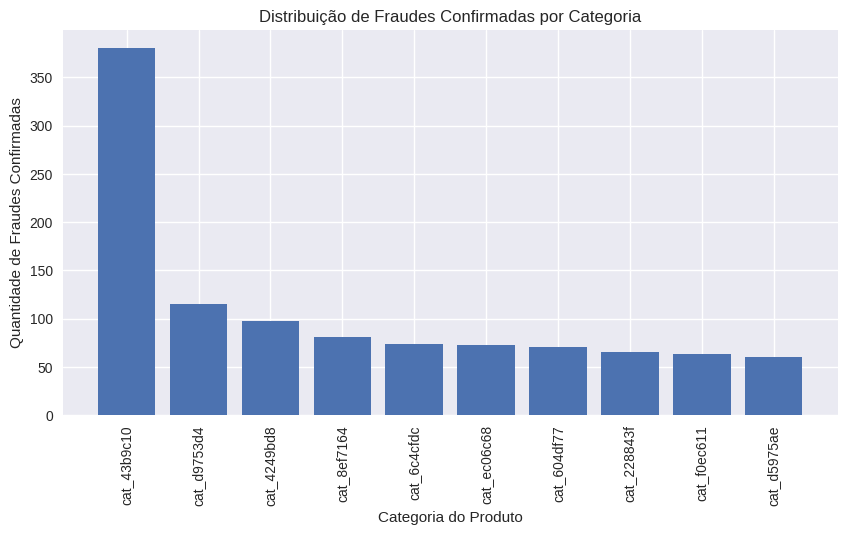

In [ ]:
# Plotar gráfico com distriobuição dos pedidos fraudados por categoria

fraude_categ_top10 = fraudes_categorias.sort_values(by= 'quantidade', ascending= False).head(10)

plt.figure(figsize=(10, 5))

plt.bar(fraude_categ_top10['categoria_produto'], fraude_categ_top10['quantidade'])

plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Fraudes Confirmadas')
plt.title('Distribuição de Fraudes Confirmadas por Categoria')
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Quantas categorias distintas de produtos aparecem neste dataset entre as fraudes confirmadas?

pedidos_fraudes['categoria_produto'].nunique()

# são quase 2 mil categorias, praticamente impossível agrupar e analisar por categoria de produto

1959

In [ ]:
# Porém, o gráfico acima evidencia que há uma categoria de produtos que possui bem mais registros que as demais, vamos ver qual categoria é esta

cat_predominante = pedidos_fraudes.loc[pedidos_fraudes['categoria_produto'] == 'cat_43b9c10']
cat_predominante

# Há uma predileção evidente por comprar celulares com pedidos fraudados!


,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,pais,produto,categoria_produto,data_compra,valor_compra,score_fraude_modelo,fraude
199,4,0.8904,427148.73,12.0,0.000000,0.0,13,0.128928,570.0,36.0,0,N,N,BR,Celular Xiaomi Redmi Note 8 64gb Versão Global...,cat_43b9c10,2020-03-27 0:30:56,246.68,89,1
504,4,0.9562,5018758.31,1.0,0.000000,4.0,0,0.877354,2696.0,0.0,1,N,N,BR,Xiaomi Mi 9t Dual Sim 64 Gb Azul-glacial 6 Gb Ram,cat_43b9c10,2020-04-02 4:51:20,334.28,95,1
1341,4,0.8986,104398.80,6.0,0.000000,4.0,11,0.640021,1595.0,915.0,0,NaN,N,BR,Samsung S10+ Plus 128gb Tela 6.4 Anatel Lacrad...,cat_43b9c10,2020-03-10 21:11:25,822.99,77,1
1592,4,NaN,NaN,1.0,0.000000,3.0,4,0.078646,787.0,0.0,1,N,N,BR,Celular Motorola Moto G8 Play 32gb Dual 6.2 1...,cat_43b9c10,2020-03-12 23:33:10,220.73,99,1
2046,4,0.8412,1963982.60,7.0,0.034092,21.0,5,0.932201,2479.0,400.0,1,N,N,BR,Celular Motorola Moto E6 Play Xt2029 Dual 32gb...,cat_43b9c10,2020-04-17 9:23:39,270.92,91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149134,4,0.9055,2907622.95,36.0,0.000000,2.0,2,0.970305,1177.0,202.0,1,N,Y,BR,Samsung Galaxy A10s 32 Gb Preto 2 Gb Ram,cat_43b9c10,2020-04-08 12:55:13,182.55,88,1
149378,4,0.8865,397907.14,11.0,0.000000,0.0,0,0.506032,307.0,212.0,0,NaN,N,BR,Motorola E5 Dual Sim 16 Gb Cinza-flash 2 Gb Ram,cat_43b9c10,2020-03-14 22:23:14,150.46,93,1
149407,4,0.8198,5186133.26,3.0,0.000000,-2.0,3,0.117015,3619.0,485.0,1,NaN,N,US,Samsung Galaxy A30 32 Gb Blanco 3 Gb Ram,cat_43b9c10,2020-04-09 21:40:37,340.92,51,1
149606,4,0.9015,2541538.67,50.0,0.000000,4.0,4,0.798711,620.0,545.0,0,NaN,N,BR,Samsung Galaxy A10 Dual Sim 32 Gb Preto 2 Gb Ram,cat_43b9c10,2020-04-04 8:12:16,155.00,87,1


In [ ]:
# Qual é a segunda categoria mais fraudada?

cat_2 = pedidos_fraudes.loc[pedidos_fraudes['categoria_produto'] == 'cat_d9753d4']
cat_2

# Esta categoria já mistura vários tipos de produtos... chaveiros, brinquedos, cursos online, cobertores...

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,pais,produto,categoria_produto,data_compra,valor_compra,score_fraude_modelo,fraude
16,2,NaN,NaN,1.0,0.0,1.0,0,0.879664,1233.0,0.0,0,NaN,N,BR,Chaveiro Lindo Do Thor,cat_d9753d4,2020-03-28 17:09:53,5.46,91,1
460,2,1.0000,5.50,1.0,0.0,1.0,0,0.790772,3208.0,0.0,1,N,N,BR,Kit Chaveiro Brasil,cat_d9753d4,2020-04-02 23:41:02,5.50,95,1
556,2,1.0000,5.67,1.0,0.0,26.0,0,0.694890,5593.0,0.0,1,N,N,BR,Chaveiro Lindo Do Thanos,cat_d9753d4,2020-03-27 21:27:19,5.43,94,1
1087,3,1.0000,27.76,5.0,0.0,20.0,0,0.255580,3160.0,0.0,1,N,N,BR,Tear Afegão Serenity Loms Manta Cobertor Tapet...,cat_d9753d4,2020-03-19 14:24:13,7.47,90,1
3234,2,1.0000,5.53,1.0,0.0,21.0,0,0.977720,3547.0,0.0,1,N,N,BR,Chaveiro Brasil Lindo,cat_d9753d4,2020-03-29 23:51:45,5.55,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143043,2,NaN,NaN,8.0,0.0,1.0,0,0.477977,896.0,128.0,0,N,N,BR,Con-ti Fort-ni-t,cat_d9753d4,2020-04-04 14:20:43,29.35,93,1
143379,2,NaN,NaN,1.0,0.0,1.0,0,0.798796,816.0,0.0,1,NaN,N,BR,Curso Marcus Trombetta- A Riqueza Está Na Mente,cat_d9753d4,2020-03-10 21:56:13,8.90,100,1
147473,3,0.7224,408.97,1.0,0.0,15.0,0,0.513884,2084.0,0.0,1,Y,N,BR,Fórmula De Lançamento Versão 19/03/2020 6em7 +...,cat_d9753d4,2020-04-20 12:24:53,3.73,56,1
148420,3,1.0000,23.31,4.0,0.0,7.0,0,0.623647,87.0,0.0,0,N,N,BR,Tear Afegãou Serenty Lonmsn Manta Cobertour Ta...,cat_d9753d4,2020-03-23 14:05:02,7.77,100,1


In [ ]:
# Qual é a terceira categoria mais fraudada?

cat_3 = pedidos_fraudes.loc[pedidos_fraudes['categoria_produto'] == 'cat_4249bd8']
cat_3

# Esta categoria contém os tênis, outro tipo de produto frequentemente alvo de fraudes

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,pais,produto,categoria_produto,data_compra,valor_compra,score_fraude_modelo,fraude
520,4,0.5676,6536.84,3.0,0.126304,0.0,1,0.389304,1703.0,33.0,0,N,N,BR,Tênis Air Force 1 Supreme - Basqueteball Micha...,cat_4249bd8,2020-03-27 20:32:39,16.78,97,1
4016,4,0.7420,55547.95,50.0,0.214865,7.0,4,0.683674,976.0,348.0,1,NaN,Y,BR,Kit 2 Pares Tênis Infantil Menino Luccas Neto ...,cat_4249bd8,2020-03-27 8:38:35,14.38,87,1
4456,4,0.6176,3229.32,8.0,0.299124,0.0,1,0.909767,1182.0,128.0,1,N,Y,BR,Conga Redley Monocromo,cat_4249bd8,2020-04-18 9:41:48,15.73,65,1
5461,4,0.8435,2756.69,1.0,0.000000,0.0,2,0.120221,249.0,4.0,0,N,N,BR,Tênis Old School Vans Rosa,cat_4249bd8,2020-03-16 22:24:02,34.42,94,1
6777,4,0.7872,6211.43,25.0,0.000000,0.0,1,0.416197,267.0,76.0,0,N,N,BR,Tênis Sxhox Classic Deliver 4 Molas Original S...,cat_4249bd8,2020-04-16 21:26:51,39.17,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132973,4,0.7348,1836.29,35.0,0.000000,0.0,1,0.955703,48.0,44.0,0,N,N,BR,Tenis Masculino Mizuno Wave Prophecy 2 7 8 Ori...,cat_4249bd8,2020-03-14 0:50:36,27.96,65,1
133431,4,0.6910,29593.80,1.0,0.000000,9.0,5,0.230906,2911.0,0.0,1,Y,N,BR,Kit 3 Pares Tenis Masculino Academia Correr Ca...,cat_4249bd8,2020-03-13 10:13:42,32.01,18,1
133689,4,0.7643,73571.61,15.0,0.227175,0.0,7,0.226572,170.0,170.0,1,NaN,Y,BR,Tênis Feminino Casual Verniz Moleca 5605.107 O...,cat_4249bd8,2020-04-06 11:57:50,13.69,93,1
138336,4,0.7478,4787.82,43.0,0.198999,0.0,2,0.963988,155.0,152.0,1,N,Y,BR,Tênis Masculino Volta As Aulas 34 Ao 44,cat_4249bd8,2020-04-20 20:00:49,15.42,92,1


In [ ]:
# só para comparar, no dataset inteiro existem quantas categorias de produtos ao todo?

df['categoria_produto'].nunique()

# Nem todas as categorias de produtos são alvos de fraude. Como são milhares de categorias diferentes, talvez seja possível usar algum algoritmo de clusterização
# para avaliar se há algum agrupamento de categorias mais propensas à fraudes, seria um aprendizado ML não supervisionado para noa ajudar a compreender as características
# mais comuns em compras fraudadas. Como temos a categoria fraude anotada após a compra ter fraude confirmada, podemos aplicar o cluster apenas nestes dados marcados para
# entender as características internas a este grupo

8324

In [ ]:
# E os produtos, quantos são ao todo e quantos diferentes produtos em compras fraudadas?

# Existe alguma predileção por produtos alvo de fraude?

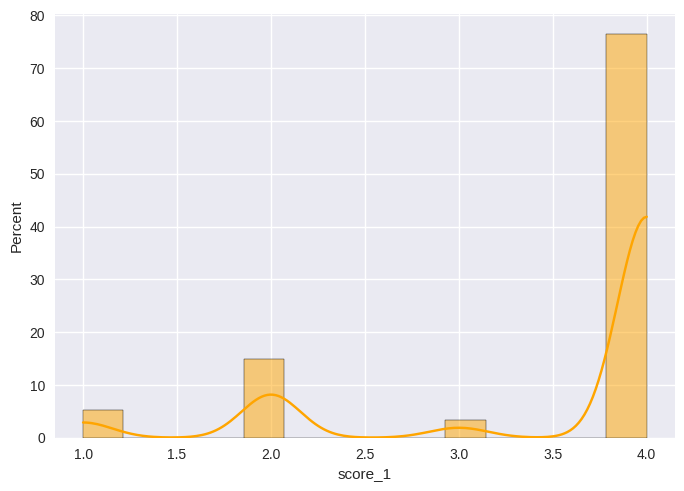

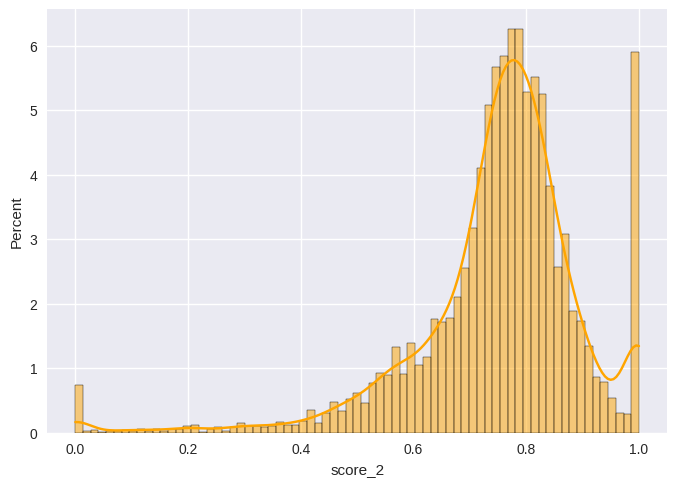

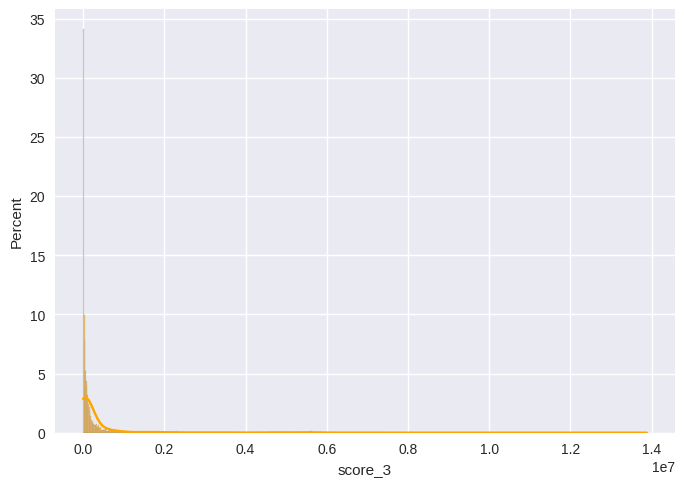

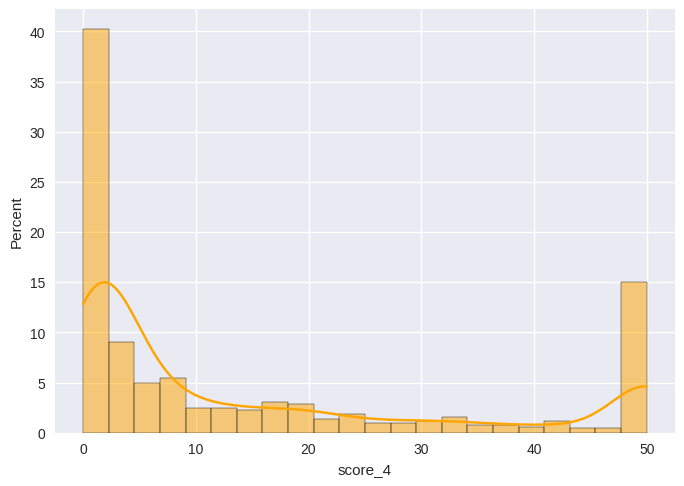

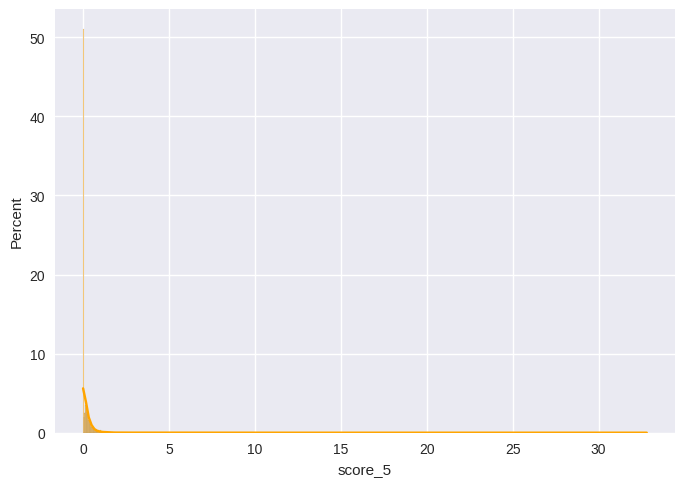

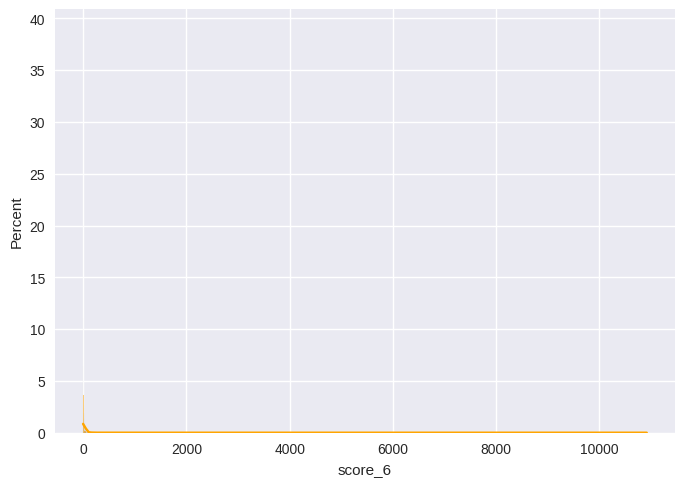

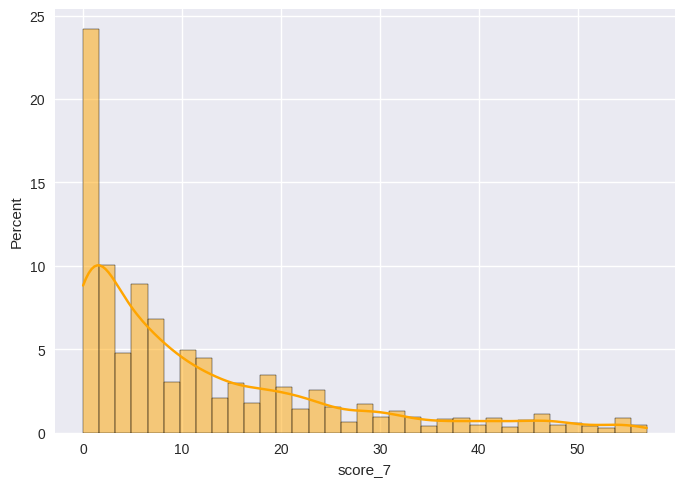

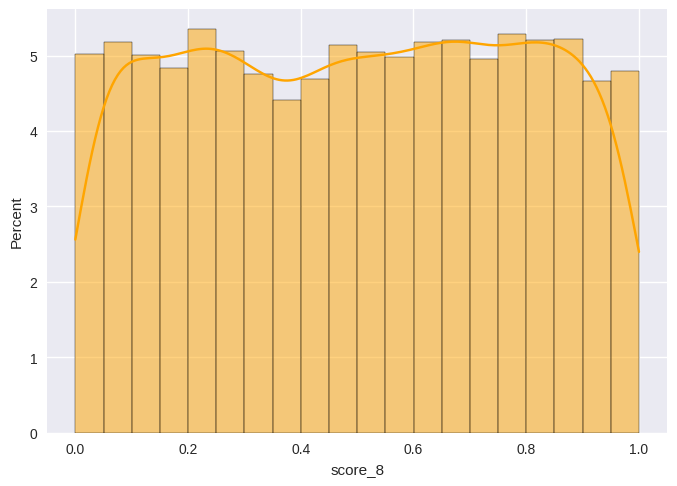

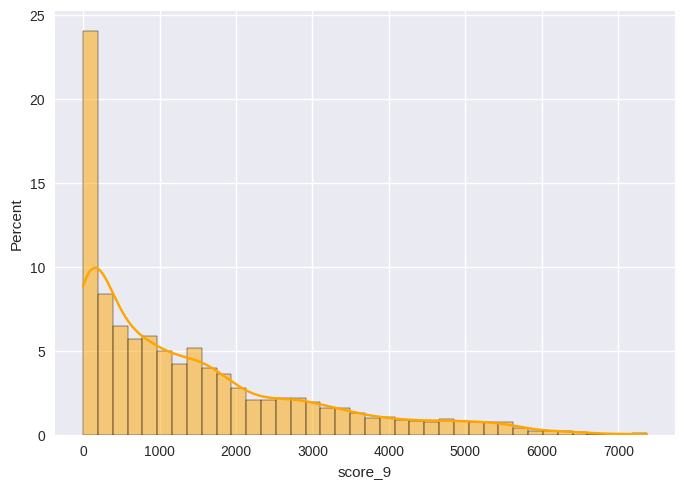

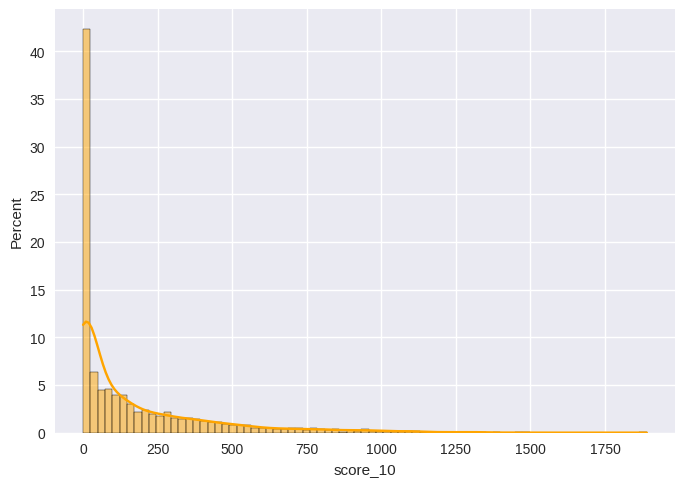

In [ ]:
# vamos olhar para outras features:
# Por exemplo as 10 colunas de scores, o que elas dizem? Existe alguma relação entre as fraudes confirmadas e os scores?

# Plotando as distribuições das colunas score, para sabermos se há algum score com maioria das linhas de dados

scores = ['score_1', 'score_2', 'score_3', 'score_4', 'score_5',
'score_6', 'score_7', 'score_8', 'score_9', 'score_10']

for i in scores:
  sns.histplot(data= pedidos_fraudes, x= i, kde= True, stat= 'percent', color='#FFA500' )
  plt.show()


  * Como utilizamos apenas os dados filtrados com fraudes confirmadas, podemos avaliar quais scores estão mais fortemente relacionandos ás compras fraudadas.

  * Por exemplo: o score_1 varia de 1 a 4 e mais dee 80% dos casos de fraude foram no score 4, apesar de haver alguns em outras faixas de score. Assim este score_1 pode ser entendido como uma espécie de fator de risco, quanto maior o valor, maior o risco.

  * Já o score_8 varia entre 0 e 1 e apresenta uma distribuição quase constante de transações fraudadas que foram classificadas com cada faixa de score, não importando muito para diferenciar transações fraudadas das transações normais.

  * O score_2 varia entre 0 e 1 e a grande maioria da distribuição está enviesada para a direita, entre os valores 0,6 a 0,8 e muitos também no score 1, o que também indica uma espécie de fator de risco: quanto maior o valor do score atribuído, maior o risco.

  * Enquanto isso, o score_4, o score_7, score_9 e score_10 apresentam distribuições fortemente enviesadas para a esquerda, com a maioria dos dados classificados no 0, o que pode indicar uma classificação da probabilidade de inadimplência, sendo scores baixos dados a clientes com alta probabilidade de inadimplência

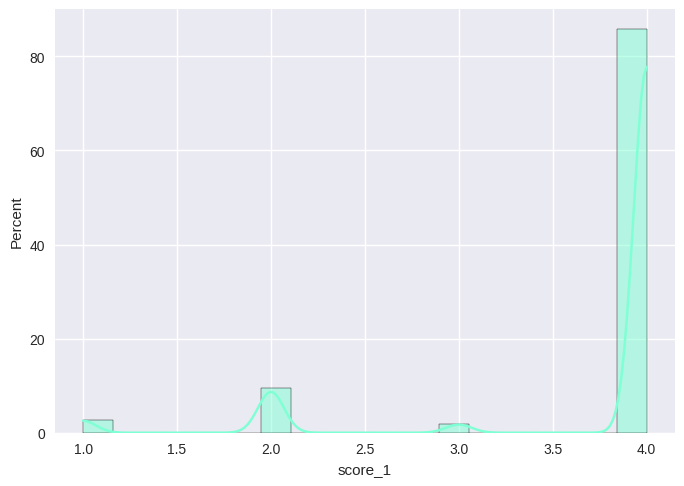

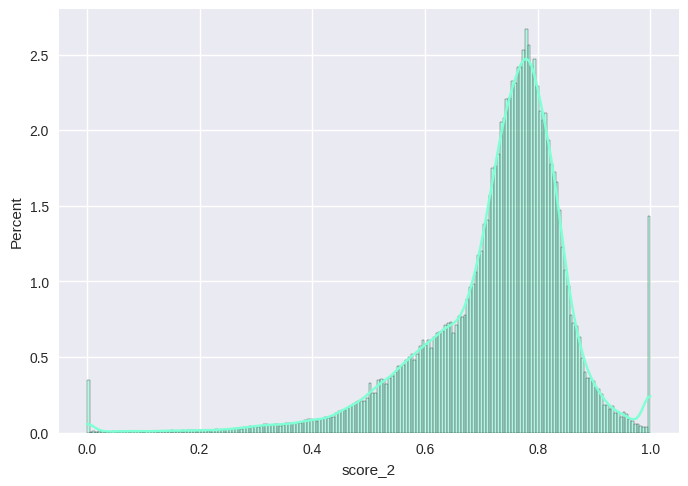

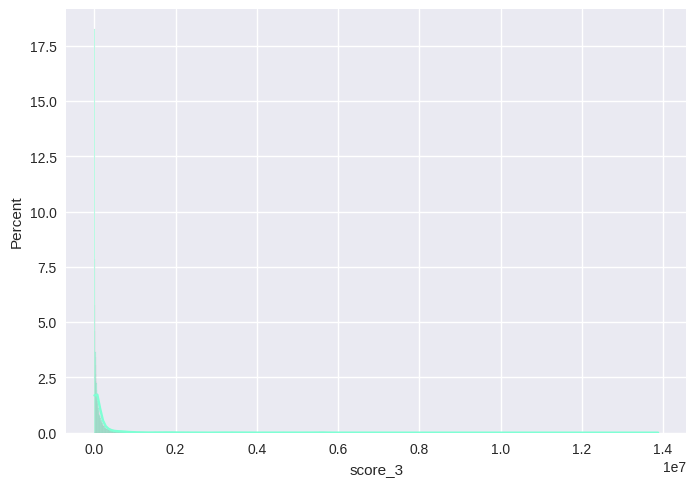

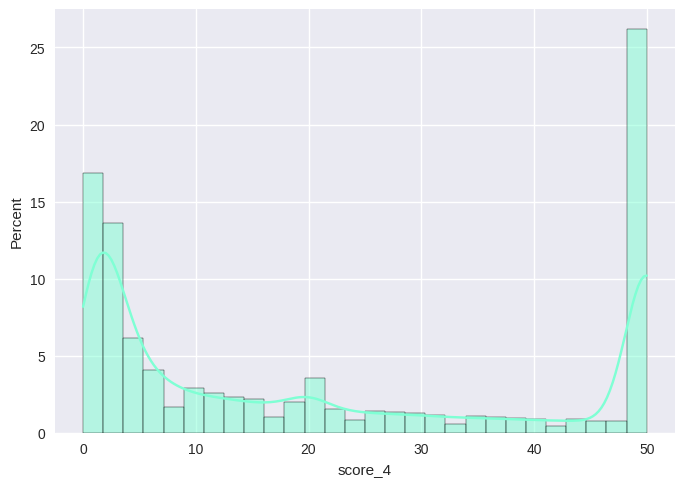

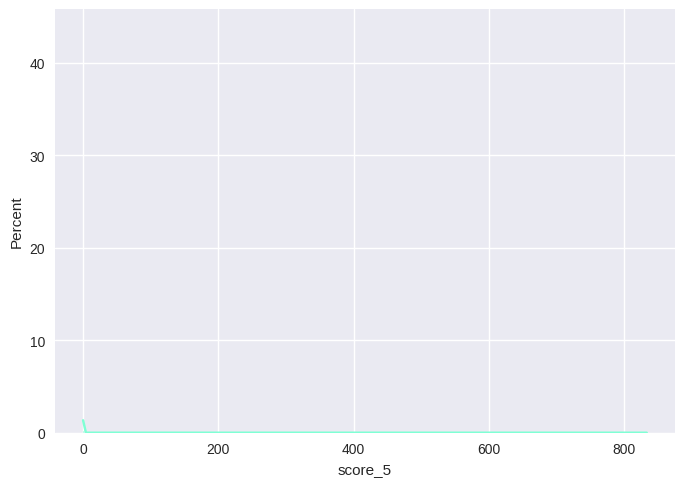

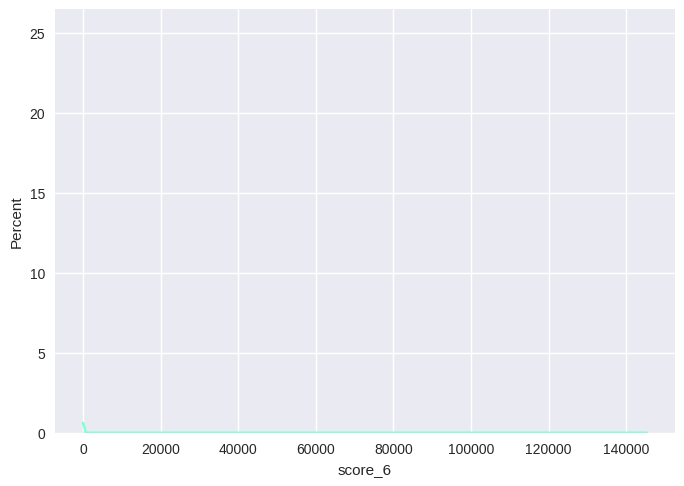

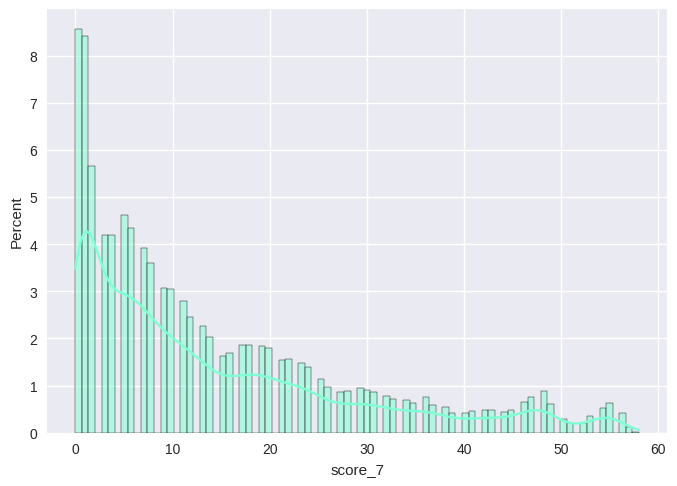

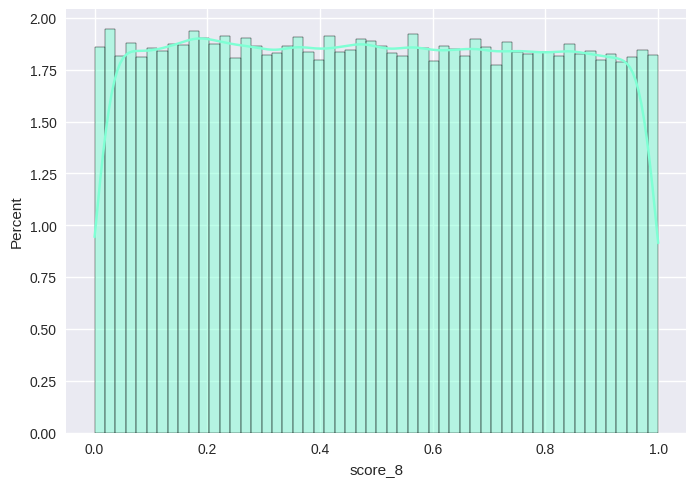

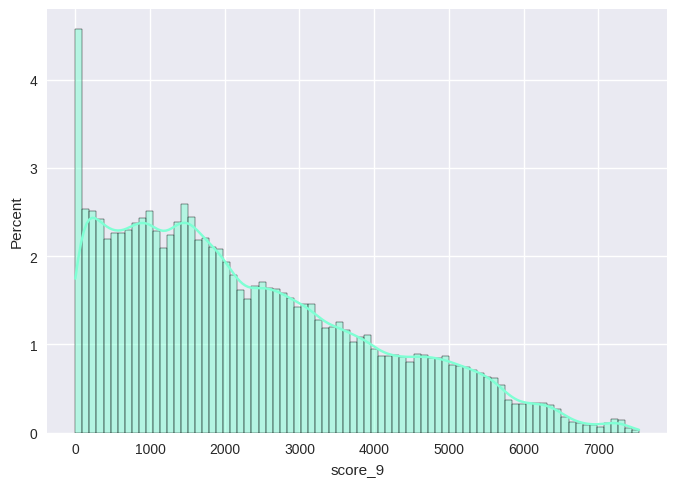

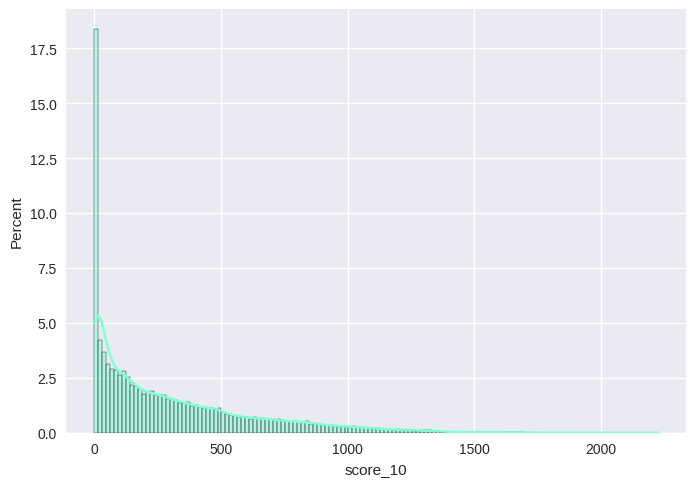

In [ ]:
# Só para confirmar a hipótese de que os scores 1 e 2 são avaliações de risco e
# que os scores 4, 7, 9 e 10 são scores de probabilidade de adimplência,
# vamos olhar rapidamente para o conjunto completo de dados

# Aproveitaremos para também tentar entender o que são os demais scores que não analisamos no passo anterior

for i in scores:
  sns.histplot(data= df, x= i, kde= True, stat= 'percent', color='#7FFFD4' )
  plt.show()

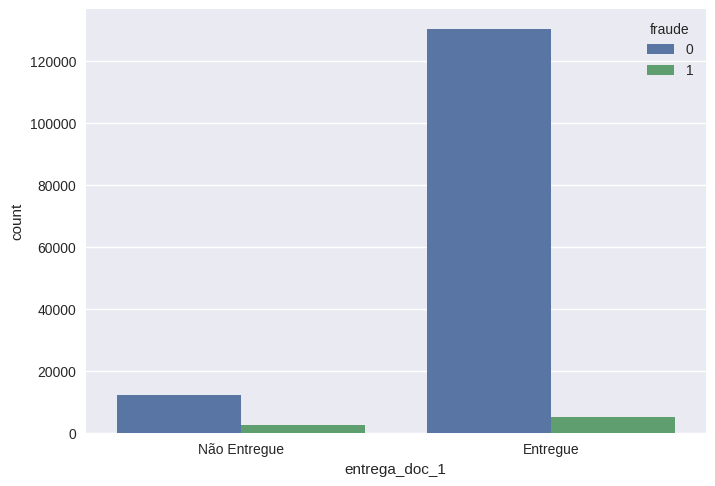

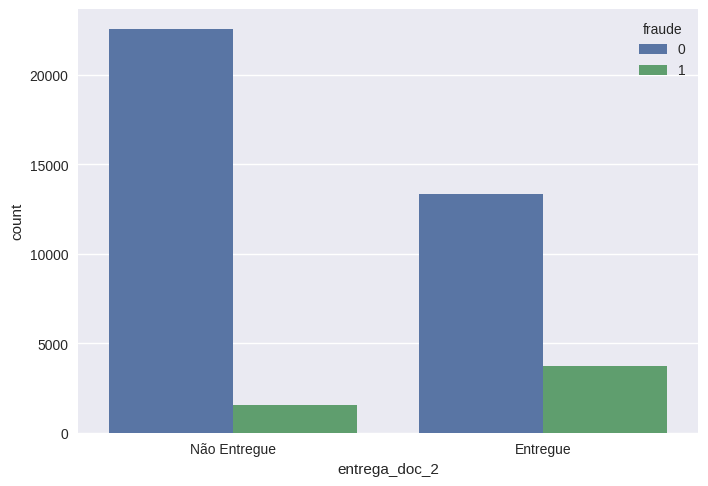

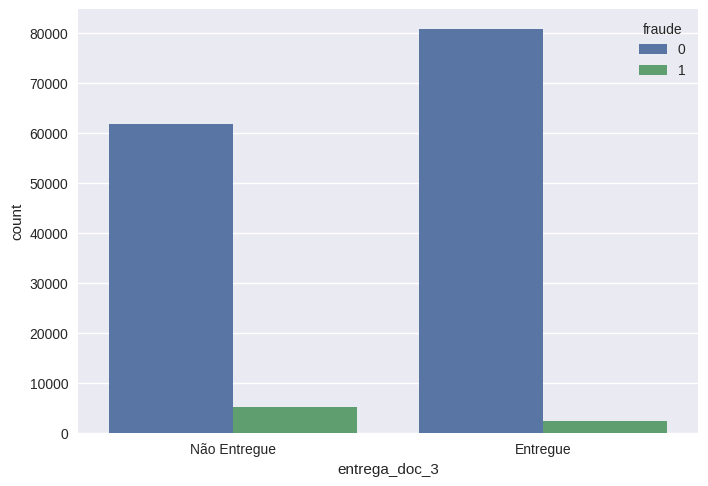

In [ ]:
# E as colunas de documentos entregues, mostram algo a respeito das fraudes confirmadas?

cols = ['entrega_doc_1', 'entrega_doc_2', 'entrega_doc_3']

for col in cols:
  ax = sns.countplot(data= df, x= col, hue= 'fraude')
  ax.set_xticklabels(['Não Entregue', 'Entregue'])
  plt.show()


In [ ]:

perc_fraude_doc1 = df[['fraude', 'entrega_doc_1']].groupby('fraude').value_counts(normalize= True).reset_index()

#perc_fraude_doc1.rename(columns= {'fraude': 'Fraude', 'entrega_doc_1': 'Entrega Doc 1', '0': 'Percentual'})

perc_fraude_doc1

,fraude,entrega_doc_1,0
0,0,1,0.913775
1,0,0,0.086225
2,1,1,0.685333
3,1,0,0.314667


In [ ]:
perc_fraude_doc2 = df[['fraude', 'entrega_doc_2']].groupby('fraude').value_counts(normalize= True).reset_index()

perc_fraude_doc2

,fraude,entrega_doc_2,0
0,0,Y,0.628122
1,0,N,0.371878
2,1,N,0.704731
3,1,Y,0.295269


In [ ]:
perc_fraude_doc3 = df[['fraude', 'entrega_doc_3']].groupby(by='fraude').value_counts(normalize= True).reset_index()

perc_fraude_doc3

,fraude,entrega_doc_3,0
0,0,Y,0.566372
1,0,N,0.433628
2,1,N,0.677200
3,1,Y,0.322800


In [ ]:
# E por fim, a data da compra, o que pode ser extraído em relação à data e as compras fraudadas?

print(df['data_compra'].min())
print(df['data_compra'].max())

# Este dataset compreende apenas um período de pouco mais de um mês entre março de 2020 e abr de 2020
# Podemos separar por data, mês e horário

2020-03-08 0:02:15
2020-04-21 9:59:33


In [ ]:
# Convertendo para datetime

df['data_compra'] = pd.to_datetime(df['data_compra'], errors= 'coerce')

df.dtypes

score_1                         int64
score_2                       float64
score_3                       float64
score_4                       float64
score_5                       float64
score_6                       float64
score_7                         int64
score_8                       float64
score_9                       float64
score_10                      float64
entrega_doc_1                   int64
entrega_doc_2                  object
entrega_doc_3                  object
pais                           object
produto                        object
categoria_produto              object
data_compra            datetime64[ns]
valor_compra                  float64
score_fraude_modelo             int64
fraude                          int64
dtype: object

In [ ]:
# separando a data em novas colunas

df['month_data'] = df['data_compra'].dt.month

df['day_data'] = df['data_compra'].dt.day

df['day_week'] = df['data_compra'].dt.day_of_week


In [ ]:
df['month_day_data'] = df['data_compra'].dt.strftime('%m-%d')


In [ ]:
df['month_day_data'].unique()

array(['03-27', '04-15', '03-25', '04-16', '04-02', '04-13', '03-22',
       '04-12', '04-20', '03-11', '03-15', '04-19', '03-16', '03-20',
       '03-28', '04-07', '03-13', '04-03', '03-30', '04-11', '03-19',
       '04-14', '04-17', '03-08', '04-09', '04-10', '04-18', '04-06',
       '03-12', '03-17', '03-09', '04-05', '04-21', '04-08', '03-24',
       '03-10', '03-29', '03-23', '03-18', '03-14', '03-21', '03-26',
       '04-01', '03-31', '04-04'], dtype=object)

In [ ]:
df['month_data'].unique()

array([3, 4])

In [ ]:
df['day_data'].unique()

array([27, 15, 25, 16,  2, 13, 22, 12, 20, 11, 19, 28,  7,  3, 30, 14, 17,
        8,  9, 10, 18,  6,  5, 21, 24, 29, 23, 26,  1, 31,  4])

In [ ]:
# Monday is 0, Sunday is 6

df['day_week'].unique()

array([4, 2, 3, 0, 6, 5, 1])

In [ ]:
df['month_day_data'] = pd.to_datetime(df['month_day_data'], format='%m-%d', errors= 'coerce')


In [ ]:
df['month_day_data'] = df['month_day_data'].dt.strftime('%m-%d')


In [ ]:
sum_month = df[['month_data', 'valor_compra', 'fraude']].groupby(['month_data', 'fraude']).sum().reset_index()

sum_month

,month_data,fraude,valor_compra
0,3,0,3240261.90
1,3,1,282179.80
2,4,0,2740937.10
3,4,1,265091.32


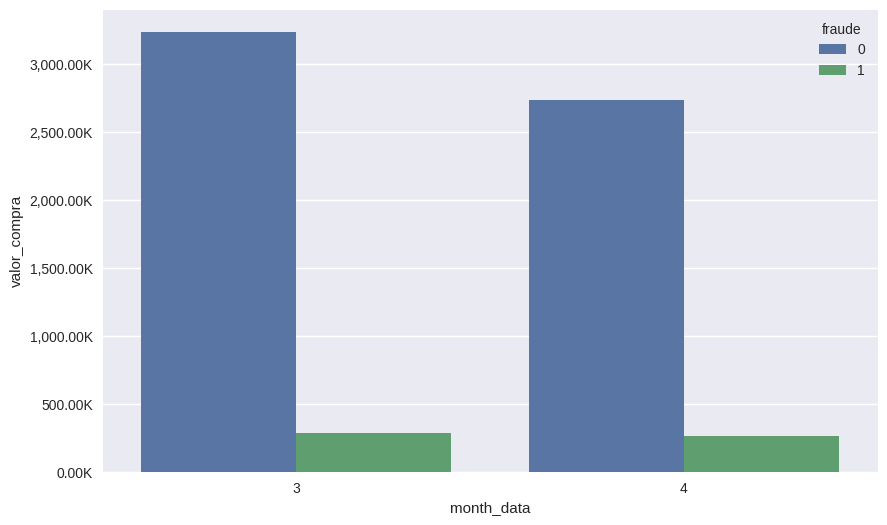

In [ ]:
# mas antes vamos imprimir um gráfico com a distribuição dos casos comuns e de fraude ao longo do tempo

fig, ax= plt.subplots(figsize= (10,6))

ax = sns.barplot( data= sum_month, x= 'month_data', y= 'valor_compra', hue= 'fraude')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000) + 'K'))

plt.show()


In [ ]:

sum_month_day =  df[['month_day_data', 'valor_compra', 'fraude']].groupby(['month_day_data', 'fraude']).sum().reset_index()

sum_month_day

,month_day_data,fraude,valor_compra
0,03-08,0,113830.82
1,03-08,1,9798.05
2,03-09,0,190010.34
3,03-09,1,14666.02
4,03-10,0,182384.29
...,...,...,...
85,04-19,1,9028.48
86,04-20,0,208400.31
87,04-20,1,23163.98
88,04-21,0,193130.16


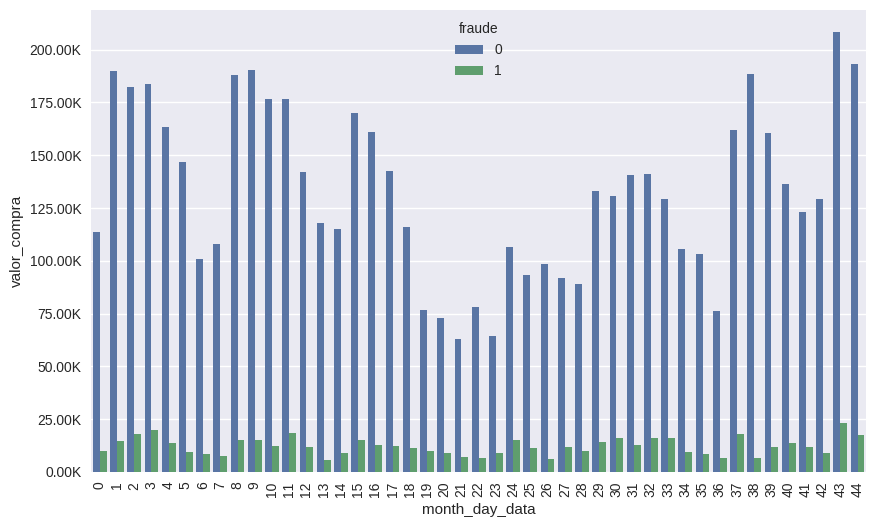

In [ ]:
# mas antes vamos imprimir um gráfico com a distribuição dos casos comuns e de fraude ao longo do tempo

fig, ax= plt.subplots(figsize= (10,6))

ax = sns.barplot( data= sum_month_day, x= 'month_day_data', y= 'valor_compra', hue= 'fraude')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000) + 'K'))
ax.set_xticklabels(ax.get_xticks(), rotation= 90)
plt.show()


## Feature Engineering

## Preparação do Pipeline para os Modelos de ML

## Avaliação Comparativa dos Modelos

## Impacto Financeiro do Modelo de ML

## Conclusão